# Traffic Light Classification - Udacity Data

In [1]:
import os
import shutil
import glob
import numpy as np

import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Split data into train/valid/test sets

In [4]:
# Path to the original dataset
base_dir = '../data/udacity/combined_data/'

# Directories for our train and valid and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
valid_dir = os.path.join(base_dir, 'valid')
os.mkdir(valid_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with training green light images
train_green_dir = os.path.join(train_dir, 'green')
os.mkdir(train_green_dir)

# Directory with training red light images
train_red_dir = os.path.join(train_dir, 'red')
os.mkdir(train_red_dir)

# Directory with training yellow light images
train_yellow_dir = os.path.join(train_dir, 'yellow')
os.mkdir(train_yellow_dir)

# Directory with training no light images
train_nolight_dir = os.path.join(train_dir, 'nolight')
os.mkdir(train_nolight_dir)

# Directory with validation green light images
valid_green_dir = os.path.join(valid_dir, 'green')
os.mkdir(valid_green_dir)

# Directory with validation red light images
valid_red_dir = os.path.join(valid_dir, 'red')
os.mkdir(valid_red_dir)

# Directory with validation yellow light images
valid_yellow_dir = os.path.join(valid_dir, 'yellow')
os.mkdir(valid_yellow_dir)

# Directory with validation no light images
valid_nolight_dir = os.path.join(valid_dir, 'nolight')
os.mkdir(valid_nolight_dir)

# Directory with test green light images
test_green_dir = os.path.join(test_dir, 'green')
os.mkdir(test_green_dir)

# Directory with test red light images
test_red_dir = os.path.join(test_dir, 'red')
os.mkdir(test_red_dir)

# Directory with test yellow light images
test_yellow_dir = os.path.join(test_dir, 'yellow')
os.mkdir(test_yellow_dir)

# Directory with test no light images
test_nolight_dir = os.path.join(test_dir, 'nolight')
os.mkdir(test_nolight_dir)

# Copy 80% of green light images from site data (.jpg) to train_green_dir
fnames = glob.glob(base_dir+'green/*.jpg')
for fname in fnames[:int(len(fnames)*0.8)]:
    f = fname.split('/')[5]
    dst = os.path.join(train_green_dir, f)
    shutil.copyfile(fname, dst)
# Copy 10% of green light images from site data to valid_green_dir
for fname in fnames[int(len(fnames)*0.8):int(len(fnames)*0.9)]:
    f = fname.split('/')[5]
    dst = os.path.join(valid_green_dir, f)
    shutil.copyfile(fname, dst)
# Copy 10% of green light images from site data to test_green_dir
for fname in fnames[int(len(fnames)*0.9):]:
    f = fname.split('/')[5]
    dst = os.path.join(test_green_dir, f)
    shutil.copyfile(fname, dst)
# Copy 80% of green light images from sim data (.png) to train_green_dir
fnames = glob.glob(base_dir+'green/*.png')
for fname in fnames[:int(len(fnames)*0.8)]:
    f = fname.split('/')[5]
    dst = os.path.join(train_green_dir, f)
    shutil.copyfile(fname, dst)
# Copy 10% of green light images from sim data to valid_green_dir
for fname in fnames[int(len(fnames)*0.8):int(len(fnames)*0.9)]:
    f = fname.split('/')[5]
    dst = os.path.join(valid_green_dir, f)
    shutil.copyfile(fname, dst)
# Copy 10% of green light images from sim data to test_green_dir
for fname in fnames[int(len(fnames)*0.9):]:
    f = fname.split('/')[5]
    dst = os.path.join(test_green_dir, f)
    shutil.copyfile(fname, dst)
    
# Copy 80% of red light images from site data (.jpg) to train_red_dir
fnames = glob.glob(base_dir+'red/*.jpg')
for fname in fnames[:int(len(fnames)*0.8)]:
    f = fname.split('/')[5]
    dst = os.path.join(train_red_dir, f)
    shutil.copyfile(fname, dst)
# Copy 10% of red light images from site data to valid_red_dir
for fname in fnames[int(len(fnames)*0.8):int(len(fnames)*0.9)]:
    f = fname.split('/')[5]
    dst = os.path.join(valid_red_dir, f)
    shutil.copyfile(fname, dst)
# Copy 10% of red light images from site data to test_red_dir
for fname in fnames[int(len(fnames)*0.9):]:
    f = fname.split('/')[5]
    dst = os.path.join(test_red_dir, f)
    shutil.copyfile(fname, dst)
# Copy 80% of red light images from sim data (.png) to train_red_dir
fnames = glob.glob(base_dir+'red/*.png')
for fname in fnames[:int(len(fnames)*0.8)]:
    f = fname.split('/')[5]
    dst = os.path.join(train_red_dir, f)
    shutil.copyfile(fname, dst)
# Copy 10% of red light images from sim data to valid_red_dir
for fname in fnames[int(len(fnames)*0.8):int(len(fnames)*0.9)]:
    f = fname.split('/')[5]
    dst = os.path.join(valid_red_dir, f)
    shutil.copyfile(fname, dst)
# Copy 10% of red light images from sim data to test_red_dir
for fname in fnames[int(len(fnames)*0.9):]:
    f = fname.split('/')[5]
    dst = os.path.join(test_red_dir, f)
    shutil.copyfile(fname, dst)
    
# Copy 80% of yellow light images from site data (.jpg) to train_yellow_dir
fnames = glob.glob(base_dir+'yellow/*.jpg')
for fname in fnames[:int(len(fnames)*0.8)]:
    f = fname.split('/')[5]
    dst = os.path.join(train_yellow_dir, f)
    shutil.copyfile(fname, dst)
# Copy 10% of yellow light images from site data to valid_yellow_dir
for fname in fnames[int(len(fnames)*0.8):int(len(fnames)*0.9)]:
    f = fname.split('/')[5]
    dst = os.path.join(valid_yellow_dir, f)
    shutil.copyfile(fname, dst)
# Copy 10% of yellow light images from site data to test_yellow_dir
for fname in fnames[int(len(fnames)*0.9):]:
    f = fname.split('/')[5]
    dst = os.path.join(test_yellow_dir, f)
    shutil.copyfile(fname, dst)
# Copy 80% of yellow light images from sim data (.png) to train_yellow_dir
fnames = glob.glob(base_dir+'yellow/*.png')
for fname in fnames[:int(len(fnames)*0.8)]:
    f = fname.split('/')[5]
    dst = os.path.join(train_yellow_dir, f)
    shutil.copyfile(fname, dst)
# Copy 10% of yellow light images from sim data to valid_yellow_dir
for fname in fnames[int(len(fnames)*0.8):int(len(fnames)*0.9)]:
    f = fname.split('/')[5]
    dst = os.path.join(valid_yellow_dir, f)
    shutil.copyfile(fname, dst)
# Copy 10% of yellow light images from sim data to test_yellow_dir
for fname in fnames[int(len(fnames)*0.9):]:
    f = fname.split('/')[5]
    dst = os.path.join(test_yellow_dir, f)
    shutil.copyfile(fname, dst)
    
# Copy 80% of no light images from site data (.jpg) to train_nolight_dir
fnames = glob.glob(base_dir+'nolight/*.jpg')
for fname in fnames[:int(len(fnames)*0.8)]:
    f = fname.split('/')[5]
    dst = os.path.join(train_nolight_dir, f)
    shutil.copyfile(fname, dst)
# Copy 10% of no light images from site data to valid_nolight_dir
for fname in fnames[int(len(fnames)*0.8):int(len(fnames)*0.9)]:
    f = fname.split('/')[5]
    dst = os.path.join(valid_nolight_dir, f)
    shutil.copyfile(fname, dst)
# Copy 10% of no light images from site data to test_nolight_dir
for fname in fnames[int(len(fnames)*0.9):]:
    f = fname.split('/')[5]
    dst = os.path.join(test_nolight_dir, f)
    shutil.copyfile(fname, dst)
# Copy 80% of no light images from sim data (.png) to train_nolight_dir
fnames = glob.glob(base_dir+'nolight/*.png')
for fname in fnames[:int(len(fnames)*0.8)]:
    f = fname.split('/')[5]
    dst = os.path.join(train_nolight_dir, f)
    shutil.copyfile(fname, dst)
# Copy 10% of no light images from sim data to valid_nolight_dir
for fname in fnames[int(len(fnames)*0.8):int(len(fnames)*0.9)]:
    f = fname.split('/')[5]
    dst = os.path.join(valid_nolight_dir, f)
    shutil.copyfile(fname, dst)
# Copy 10% of no light images from sim data to test_nolight_dir
for fname in fnames[int(len(fnames)*0.9):]:
    f = fname.split('/')[5]
    dst = os.path.join(test_nolight_dir, f)
    shutil.copyfile(fname, dst)

### Check how many images of each class we have in each train/valid split

In [5]:
print('Total training green light images:', len(os.listdir(train_green_dir)))

Total training green light images: 577


In [6]:
print('Total training red light images:', len(os.listdir(train_red_dir)))

Total training red light images: 749


In [7]:
print('Total training yellow light images:', len(os.listdir(train_yellow_dir)))

Total training yellow light images: 285


In [8]:
print('Total training no light images:', len(os.listdir(train_nolight_dir)))

Total training no light images: 1092


In [9]:
print('Total validation green light images:', len(os.listdir(valid_green_dir)))

Total validation green light images: 73


In [10]:
print('Total validation red light images:', len(os.listdir(valid_red_dir)))

Total validation red light images: 94


In [11]:
print('Total validation yellow light images:', len(os.listdir(valid_yellow_dir)))

Total validation yellow light images: 36


In [12]:
print('Total validation no light images:', len(os.listdir(valid_nolight_dir)))

Total validation no light images: 136


In [13]:
print('Total test green light images:', len(os.listdir(test_green_dir)))

Total test green light images: 73


In [14]:
print('Total test red light images:', len(os.listdir(test_red_dir)))

Total test red light images: 95


In [15]:
print('Total test yellow light images:', len(os.listdir(test_yellow_dir)))

Total test yellow light images: 37


In [16]:
print('Total test no light images:', len(os.listdir(test_nolight_dir)))

Total test no light images: 138


## Look at a sample images from site and sim data for each class

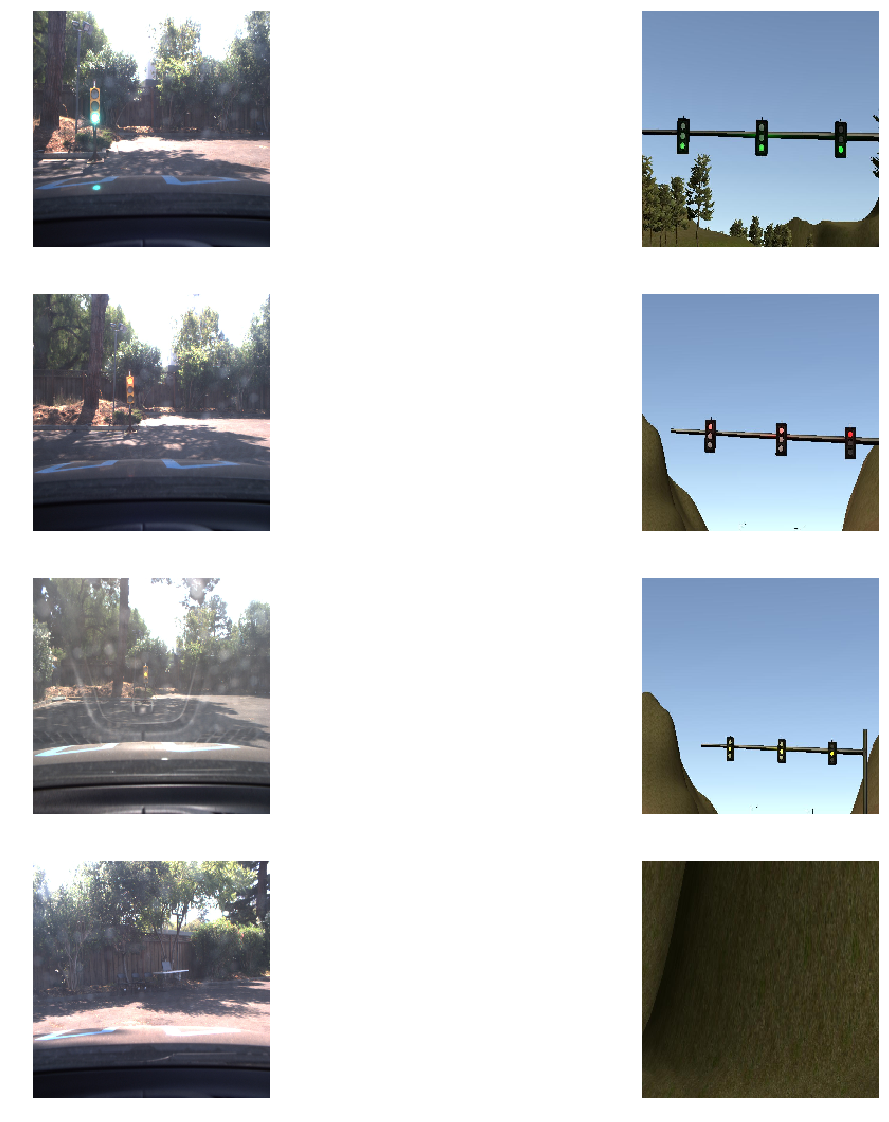

In [26]:
green_imgs = [os.path.join(train_green_dir, fname) for fname in os.listdir(train_green_dir)]
red_imgs = [os.path.join(train_red_dir, fname) for fname in os.listdir(train_red_dir)]
yellow_imgs = [os.path.join(train_yellow_dir, fname) for fname in os.listdir(train_yellow_dir)]
nolight_imgs = [os.path.join(train_nolight_dir, fname) for fname in os.listdir(train_nolight_dir)]

# Select a site and a sim image from each class
site_green_path = green_imgs[len(green_imgs)-1]
sim_green_path = green_imgs[200]
site_red_path = red_imgs[len(red_imgs)-1]
sim_red_path = red_imgs[0]
site_yellow_path = yellow_imgs[len(yellow_imgs)-1]
sim_yellow_path = yellow_imgs[0]
site_nolight_path = nolight_imgs[len(nolight_imgs)-1]
sim_nolight_path = nolight_imgs[0]
image_paths = [site_green_path,sim_green_path,site_red_path,sim_red_path,
               site_yellow_path,sim_yellow_path,site_nolight_path,sim_nolight_path]

# Plot each image
plt.figure(figsize=(20,20))
for i, path in enumerate(image_paths, 1):
    img = image.load_img(path, target_size=(224,224))
    plt.subplot(4,2,i)
    plt.axis('off')
    plt.imshow(img)

## Feature Extraction - vgg16 trained on ImageNet

In [27]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224,224,3))

In [28]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [30]:
# Load our dataset directories
base_dir = '../data/udacity/combined_data/'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))
    labels = np.zeros(shape=(sample_count, 4))
    generator = datagen.flow_from_directory(
                    directory,
                    target_size=(224, 224),
                    batch_size=batch_size,
                    class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2703)
valid_features, valid_labels = extract_features(valid_dir, 339)
test_features, test_labels = extract_features(test_dir, 343)

Found 2703 images belonging to 4 classes.
Found 339 images belonging to 4 classes.
Found 343 images belonging to 4 classes.


In [31]:
# Flatten features to feed into a densely-connected classifier
train_features = np.reshape(train_features, (2703, 7*7*512))
valid_features = np.reshape(valid_features, (339, 7*7*512))
test_features = np.reshape(test_features, (343, 7*7*512))

### Define and train a densely-connected classifier using the previously extracted features

In [32]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7*7*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=32,
                    validation_data=(valid_features, valid_labels))

Train on 2703 samples, validate on 339 samples
Epoch 1/30
2703/2703 [==============================] - 1s - loss: 0.8950 - acc: 0.6619 - val_loss: 0.6020 - val_acc: 0.7699
Epoch 2/30
2703/2703 [==============================] - 0s - loss: 0.5430 - acc: 0.7865 - val_loss: 0.4686 - val_acc: 0.7965
Epoch 3/30
2703/2703 [==============================] - 0s - loss: 0.4449 - acc: 0.8176 - val_loss: 0.3962 - val_acc: 0.8348
Epoch 4/30
2703/2703 [==============================] - 1s - loss: 0.3675 - acc: 0.8494 - val_loss: 0.3895 - val_acc: 0.8142
Epoch 5/30
2703/2703 [==============================] - 0s - loss: 0.3257 - acc: 0.8683 - val_loss: 0.2990 - val_acc: 0.8938
Epoch 6/30
2703/2703 [==============================] - 0s - loss: 0.2899 - acc: 0.8898 - val_loss: 0.2691 - val_acc: 0.9056
Epoch 7/30
2703/2703 [==============================] - 1s - loss: 0.2608 - acc: 0.8983 - val_loss: 0.2398 - val_acc: 0.9115
Epoch 8/30
2703/2703 [==============================] - 0s - loss: 0.2357 - ac

### Loss and accuracy curves during training

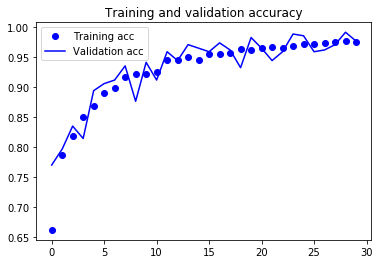

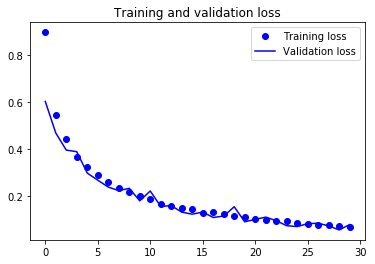

In [33]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Now try end-to-end feature extraction

In [34]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 1028      
Total params: 21,138,500
Trainable params: 21,138,500
Non-trainable params: 0
_________________________________________________________________


In [36]:
print('Number of trainable weights before freezing the conv_base:', len(model.trainable_weights))

Number of trainable weights before freezing the conv_base: 30


In [37]:
conv_base.trainable = False

In [38]:
print('Number of trainable weights after freezing the conv_base:', len(model.trainable_weights))

Number of trainable weights after freezing the conv_base: 4


In [39]:
# Define and train model with data augmentation
train_datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=90,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

# No data augmentation for validation data
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(224,224),
            batch_size=32,
            class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
            valid_dir,
            target_size=(224,224),
            batch_size=32,
            class_mode='categorical')

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
            loss='categorical_crossentropy',
            metrics=['acc'])

history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=valid_generator,
            validation_steps=10,
            verbose=2)

Found 2703 images belonging to 4 classes.
Found 339 images belonging to 4 classes.
Epoch 1/30
94s - loss: 0.8204 - acc: 0.6699 - val_loss: 0.7168 - val_acc: 0.7375
Epoch 2/30
90s - loss: 0.3620 - acc: 0.8597 - val_loss: 0.1734 - val_acc: 0.9250
Epoch 3/30
90s - loss: 0.1896 - acc: 0.9283 - val_loss: 0.0610 - val_acc: 0.9875
Epoch 4/30
90s - loss: 0.1267 - acc: 0.9565 - val_loss: 0.0464 - val_acc: 0.9935
Epoch 5/30
90s - loss: 0.0889 - acc: 0.9728 - val_loss: 0.0356 - val_acc: 0.9902
Epoch 6/30
89s - loss: 0.0786 - acc: 0.9775 - val_loss: 0.0204 - val_acc: 0.9967
Epoch 7/30
89s - loss: 0.0547 - acc: 0.9834 - val_loss: 0.0823 - val_acc: 0.9837
Epoch 8/30
89s - loss: 0.0655 - acc: 0.9800 - val_loss: 0.1003 - val_acc: 0.9837
Epoch 9/30
89s - loss: 0.0535 - acc: 0.9853 - val_loss: 0.0553 - val_acc: 0.9935
Epoch 10/30
89s - loss: 0.0539 - acc: 0.9866 - val_loss: 0.0527 - val_acc: 0.9967
Epoch 11/30
89s - loss: 0.0507 - acc: 0.9866 - val_loss: 0.0538 - val_acc: 0.9967
Epoch 12/30
89s - loss: 

In [55]:
model.save('../models/udacity_vgg_feature_extraction_combined.h5')

### Loss and accuracy curves during training

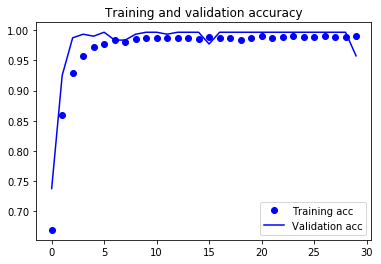

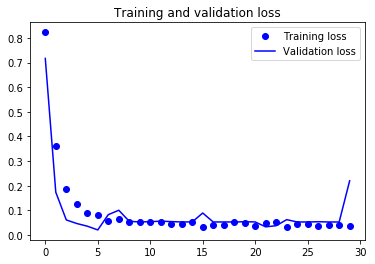

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Fine-tuning - vgg16 trained on ImageNet

In [42]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [43]:
# Set the final 3 conv layers to trainable for fine-tuning
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [45]:
# Fine-tune model with very small learning rate
model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
            loss='categorical_crossentropy',
            metrics=['acc'])

history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=valid_generator,
            validation_steps=10,
            verbose=2)

Epoch 1/30
64s - loss: 0.0197 - acc: 0.9959 - val_loss: 0.0525 - val_acc: 0.9967
Epoch 2/30
59s - loss: 0.0217 - acc: 0.9940 - val_loss: 0.0525 - val_acc: 0.9967
Epoch 3/30
59s - loss: 0.0237 - acc: 0.9928 - val_loss: 0.0525 - val_acc: 0.9967
Epoch 4/30
59s - loss: 0.0242 - acc: 0.9934 - val_loss: 0.0525 - val_acc: 0.9967
Epoch 5/30
59s - loss: 0.0181 - acc: 0.9941 - val_loss: 0.0525 - val_acc: 0.9967
Epoch 6/30
59s - loss: 0.0181 - acc: 0.9928 - val_loss: 0.0525 - val_acc: 0.9967
Epoch 7/30
60s - loss: 0.0186 - acc: 0.9941 - val_loss: 0.0525 - val_acc: 0.9967
Epoch 8/30
59s - loss: 0.0192 - acc: 0.9944 - val_loss: 0.0525 - val_acc: 0.9967
Epoch 9/30
60s - loss: 0.0212 - acc: 0.9937 - val_loss: 1.9266e-05 - val_acc: 1.0000
Epoch 10/30
59s - loss: 0.0231 - acc: 0.9947 - val_loss: 0.0525 - val_acc: 0.9967
Epoch 11/30
59s - loss: 0.0196 - acc: 0.9934 - val_loss: 0.0525 - val_acc: 0.9967
Epoch 12/30
59s - loss: 0.0113 - acc: 0.9972 - val_loss: 4.4725e-06 - val_acc: 1.0000
Epoch 13/30
60s -

In [46]:
model.save('../models/udacity_vgg_fine_tuning_combined.h5')

### Loss and accuracy curves during training

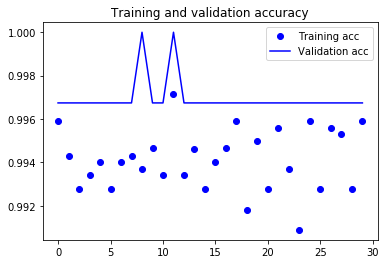

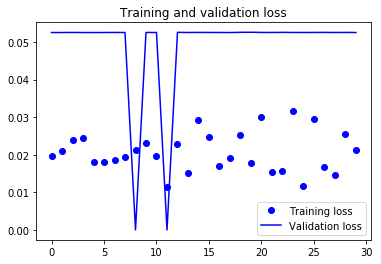

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

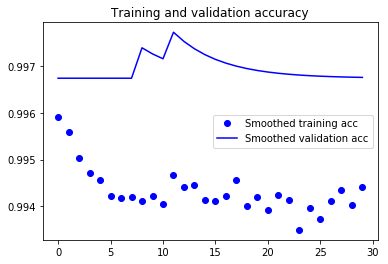

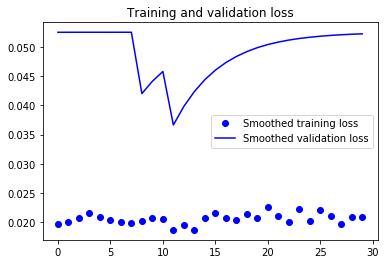

In [48]:
# Smooth curves using exponential moving averages
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Evaluate the model on test data

In [51]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
            test_dir,
            target_size=(224,224),
            batch_size=32,
            class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=10)
print('test acc:', test_acc)

Found 343 images belonging to 4 classes.
test acc: 1.0


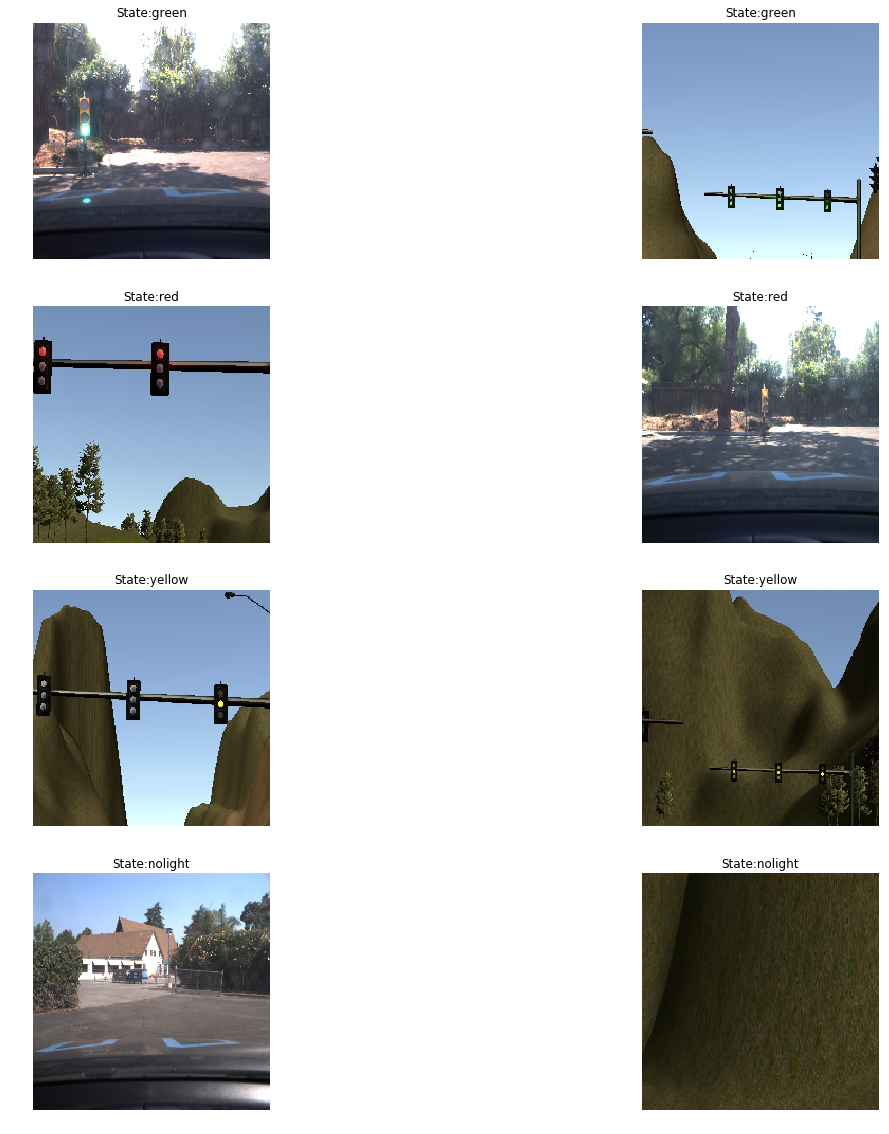

In [54]:
green_imgs = [os.path.join(test_green_dir, fname) for fname in os.listdir(test_green_dir)]
red_imgs = [os.path.join(test_red_dir, fname) for fname in os.listdir(test_red_dir)]
yellow_imgs = [os.path.join(test_yellow_dir, fname) for fname in os.listdir(test_yellow_dir)]
nolight_imgs = [os.path.join(test_nolight_dir, fname) for fname in os.listdir(test_nolight_dir)]

# Select a site and a sim image from each class
site_green_path = green_imgs[len(green_imgs)-1]
sim_green_path = green_imgs[0]
site_red_path = red_imgs[len(red_imgs)-1]
sim_red_path = red_imgs[0]
site_yellow_path = yellow_imgs[len(yellow_imgs)-1]
sim_yellow_path = yellow_imgs[0]
site_nolight_path = nolight_imgs[len(nolight_imgs)-1]
sim_nolight_path = nolight_imgs[0]
image_paths = [site_green_path,sim_green_path,site_red_path,sim_red_path,
               site_yellow_path,sim_yellow_path,site_nolight_path,sim_nolight_path]
states = ['green', 'nolight', 'red', 'yellow']
# Plot each image with predicted state
plt.figure(figsize=(20,20))
for i, path in enumerate(image_paths, 1):
    img = image.load_img(path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.
    pred = model.predict(x)
    idx = np.argmax(pred)
    plt.subplot(4,2,i)
    plt.axis('off')
    plt.title('State:{}'.format(states[idx]))
    plt.imshow(img)